In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 13}
matplotlib.rc('font', **font)

from mpl_toolkits import mplot3d

from csr2d.core2 import Es_case_D, alpha_exact_case_D, Es_case_B, alpha_exact, alpha_exact_case_B_brentq, alpha_exact_case_D_brentq
import numpy as np

In [2]:
gamma = 5000

beta = (1-1/gamma**2)**(1/2)
xval = 5e-6

rho = 1.5
lamb = 0.1/rho

sigma_x  = 50e-6
sigma_z  = 50e-6

In [3]:
#xo = 0
#xval = -6E-6
xval = 0
#xval = sigma_x

#def Es_case_D_z(z):
#    return Es_case_D(z, (xo - xval)/rho, gamma, lamb)* beta**2/rho**2

def Es_case_D_z(z):
    return Es_case_D(z, xval, gamma, lamb)* beta**2/rho**2

In [3]:
Es_case_D(-1E-6, -1E-6, gamma, lamb) * beta**2/rho**2

431201.5502649135

In [88]:
(lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2

6.666666732546567e-10

In [74]:
sigma_z /2/rho

1.6666666666666667e-05

## simple integration

In [4]:
from scipy import integrate

In [89]:
# This agrees with Mathematica
xval = 0
integrate.quad(Es_case_D_z,  (lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2 , sigma_z/2/rho)

(2.2335616144072703, 3.449855089931127e-09)

In [125]:
# This dos NOT agree with Mathematica
xval = -50E-6
integrate.quad(Es_case_D_z,  (lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2 , sigma_z/2/rho)

/tmp/ipykernel_58138/4215391333.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z,  (lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2 , sigma_z/2/rho)


(-3.5543104660514473, 3.5107706702675354e-06)

In [129]:
integrate.quad(Es_case_D_z,  -3.49E-9, -3.48E-9)

/tmp/ipykernel_58138/942739137.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z,  -3.49E-9, -3.48E-9)


(-15.365265415602705, 1.942427181729162e-05)

In [133]:
integrate.quad(Es_case_D_z,  -3.49E-9, -3.48E-9, epsrel=1E-10, epsabs=1E-10, limit=100)

/tmp/ipykernel_58138/4221832248.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z,  -3.49E-9, -3.48E-9, epsrel=1E-10, epsabs=1E-10, limit=100)


(-15.365265415602705, 1.942427181729162e-05)

In [126]:
integrate.quad(Es_case_D_z,  (lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2, -3.49E-9)

(1.8967083346738025, 1.1559876908630866e-09)

In [127]:
integrate.quad(Es_case_D_z,  -3.48E-9, sigma_z/2/rho)

(9.914243940998228, 9.411443861477096e-08)

In [58]:
integrate.quad(Es_case_D_z, -3.4999996512130593e-09, 1.6666666666666667e-05)

/tmp/ipykernel_58138/3817955673.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z, -3.4999996512130593e-09, 1.6666666666666667e-05)


(-3.5543104660514473, 3.5107706702675354e-06)

In [96]:
sigma_z/2/rho

1.6666666666666667e-05

In [94]:
(lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2

-3.4999996512130593e-09

In [92]:
zv = np.linspace(-3.4999996512130593e-09, 1.6666666666666667e-05, 1001)
zv = np.linspace((lamb - beta*np.sqrt(lamb**2 + (xo-xval)**2/rho**2))/2 , sigma_z/2/rho, 1001)

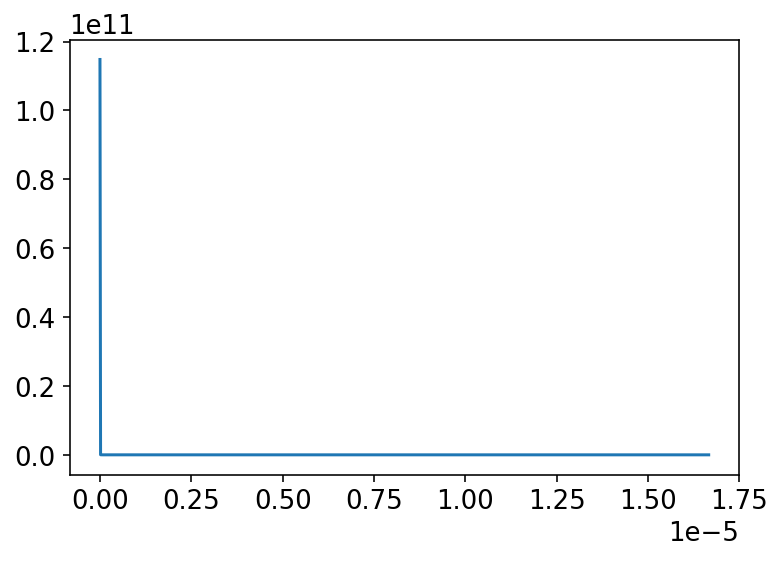

In [93]:
plt.plot(zv,Es_case_D_z(zv))

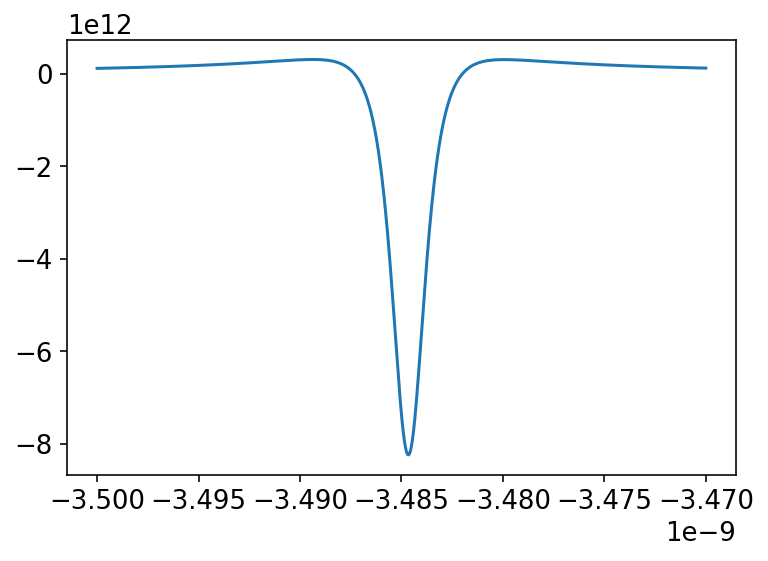

In [134]:
zv = np.linspace(-3.50e-9, -3.47e-9, 1001)
plt.plot(zv,Es_case_D_z(zv))

# Find the spike

In [4]:
from numba import njit, vectorize, float64
from quantecon.optimize.root_finding import newton 

from scipy import optimize

from scipy.signal import find_peaks 

from scipy import integrate

In [5]:
def Es_case_D_N2(z,x,gamma):
    
    beta2 = 1-1/gamma**2
    beta = np.sqrt(beta2)

    alp = alpha_exact_case_D_brentq(z, x, beta, lamb)
    
    sin2a = np.sin(2*alp)
    cos2a = np.cos(2*alp) 

    kap = (2*(alp - z) + lamb)/beta # kappa for case D
    
    return lamb*cos2a + (1+x)*sin2a - beta*kap

def Es_case_D_N2_z(z):
    return Es_case_D_N2(z,xval,gamma)

In [5]:
optimize.root(Es_case_D_N2_z, -1E-9, tol=1E-9)

    fjac: array([[-1.]])
     fun: array([4.16333634e-17])
 message: 'The solution converged.'
    nfev: 35
     qtf: array([1.66533454e-16])
       r: array([4070.01754774])
  status: 1
 success: True
       x: array([5.76372538e-10])

In [8]:
def find_Es_case_D_spike(xval):
    """
    Return a list of z values at which Es_case_D(z,xval) has spikes
    """
    
    def Es_case_D_N2_z(z):
        return Es_case_D_N2(z,xval,gamma)
    
    # First find where N2 ~ 0, and we are close to spike
    op = optimize.root(Es_case_D_N2_z, 0, tol=1E-6)
    if op.success == False:
        print('no N2 root found!!')
        return np.array([0])
    
    root = op.x[0]

    def Es_case_D_z(z):
        return Es_case_D(z, xval, gamma, lamb)
    
    zv = np.linspace( root - 2E-11, root + 2E-11, 1001 )
    peak_ix = np.union1d(find_peaks( Es_case_D_z(zv))[0], find_peaks( -Es_case_D_z(zv))[0])
    
    return list(zv[peak_ix])
    

Text(0.5, 1.0, 'Es(z) along x = -1e-07')

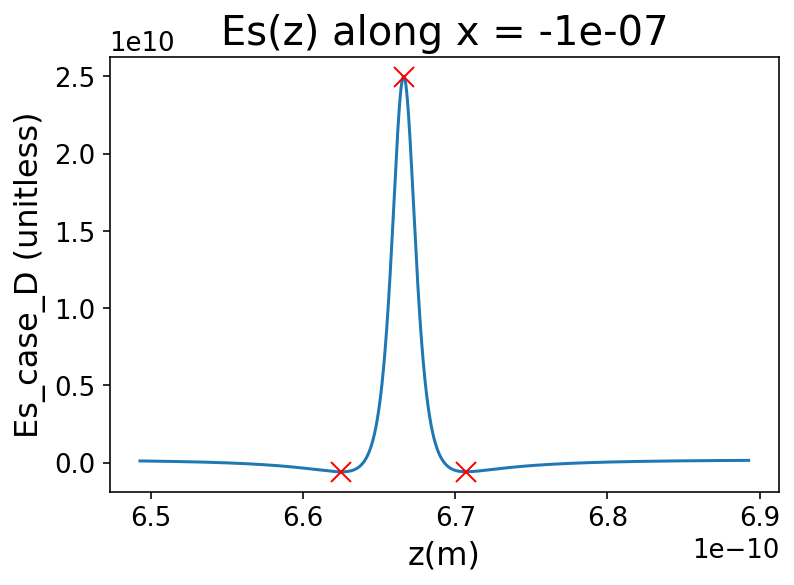

In [10]:
xval = -1E-7

z_N2_0 = optimize.root(Es_case_D_N2_z, 0, tol=1E-6).x[0]
zv = np.linspace( z_N2_0-2E-11, z_N2_0+ 2E-11, 4001)

plt.plot(zv, Es_case_D_z(zv))
#plt.plot(zv[peak_ix], Es_case_D_z(zv)[peak_ix], "x", c='red', markersize=10)

z_spike = find_Es_case_D_spike(xval)

plt.plot(z_spike , Es_case_D_z(z_spike), "x", c='red', markersize=10)

plt.xlabel('z(m)', fontsize=16)
plt.ylabel('Es_case_D (unitless)', fontsize=16)
plt.title(f'Es(z) along x = {xval}',  fontsize=20)

Text(0.5, 1.0, 'Extreme points of Es(z,x)')

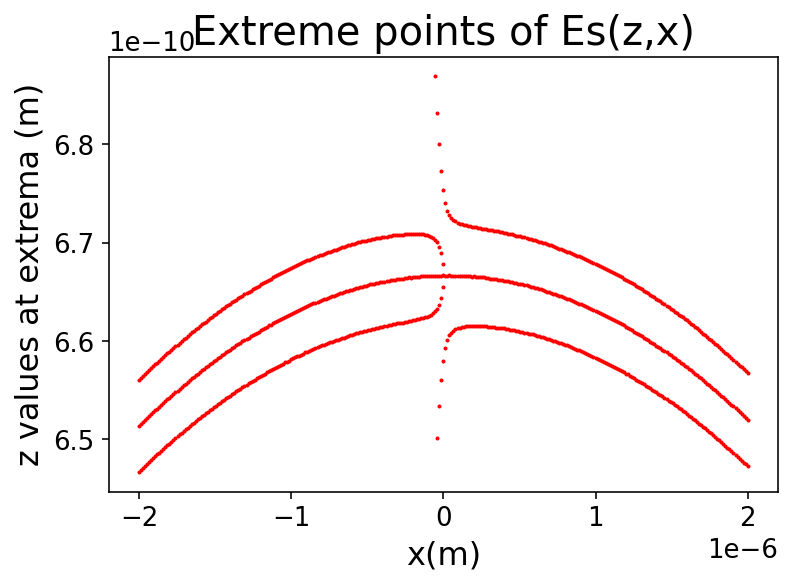

In [35]:
# This cell is just for plotting

xv = np.linspace(-2E-6, 2E-6, 301)

spike_x_points = []
spike_z_points = []

for i in range(len(xv)):
    temp = find_Es_case_D_spike(xv[i])
    
    if (len(temp))==1:
        print(xv[i])
    
    for j in range(len(temp)):
        spike_x_points.append(xv[i])
        spike_z_points.append(temp[j])

plt.plot(spike_x_points, spike_z_points, "o", c='red', markersize=1)

plt.xlabel('x(m)', fontsize=16)
plt.ylabel('z values at extrema (m)', fontsize=16)
plt.title(f'Extreme points of Es(z,x)',  fontsize=20)

[6.605845610015343e-10, 6.654245610015344e-10, 6.702245610015344e-10]

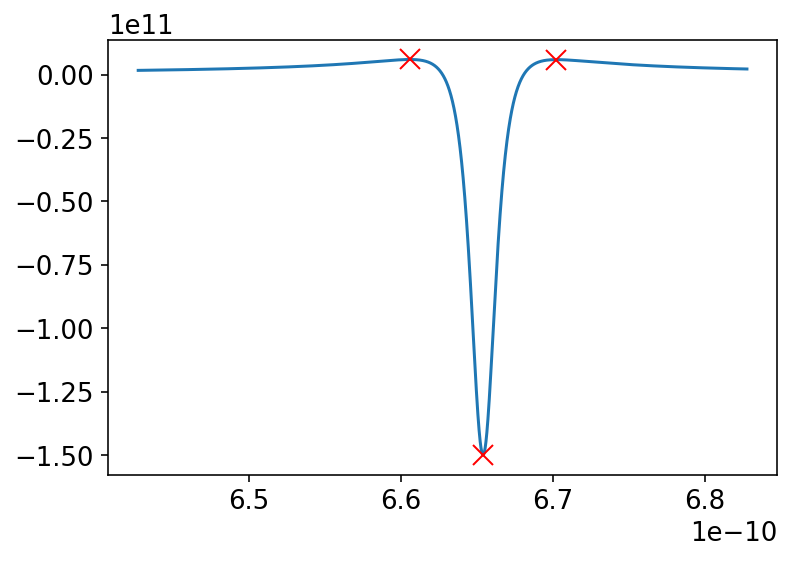

In [12]:
#z_N2_0 = optimize.root(Es_case_D_N2_z, 0, tol=1E-6).x[0]
xval = 6E-7
#xval = -sigma_x
z_N2_0 = optimize.root(Es_case_D_N2_z, 0, tol=1E-6).x[0]
zv = np.linspace( z_N2_0-2E-11, z_N2_0+ 2E-11, 4001)

z_spike = find_Es_case_D_spike(xval)

plt.plot(zv, Es_case_D_z(zv))
plt.plot(z_spike , Es_case_D_z(z_spike), "x", c='red', markersize=10)

z_spike

[-8.756019513351124e-09, -8.751339513351124e-09, -8.746619513351124e-09]

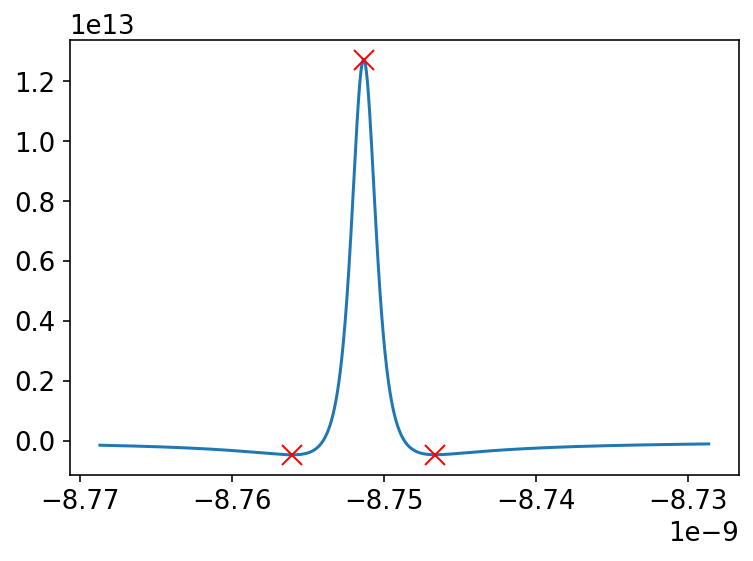

In [83]:
#z_N2_0 = optimize.root(Es_case_D_N2_z, 0, tol=1E-6).x[0]
xval = 6E-6
xval = -sigma_x
z_N2_0 = optimize.root(Es_case_D_N2_z, 0, tol=1E-6).x[0]
zv = np.linspace( z_N2_0-2E-11, z_N2_0+ 2E-11, 7003)
z_spike = find_Es_case_D_spike(xval)

plt.plot(zv, Es_case_D_z(zv))
plt.plot(z_spike , Es_case_D_z(z_spike), "x", c='red', markersize=10)

z_spike

In [96]:
z = z_N2_0
dz = 1E-6

xval = -sigma_x

integrate.quad(Es_case_D_z, z-dz/2, z+dz/2, epsrel=1e-4, limit=50)

(2.3594311942518473, 0.00016707795802681225)

In [36]:
integrate.quad(Es_case_D_z, z-dz/2, z+dz/2, points = find_Es_case_D_spike(xval), epsrel=1e-9, limit=100)

/tmp/ipykernel_62116/2621321356.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z, z-dz/2, z+dz/2, points = find_Es_case_D_spike(xval), epsrel=1e-9, limit=100)


(-0.01595637008601357, 3.044166729585645e-08)

In [38]:
integrate.quad(Es_case_D_z, -1E-6, 1E-6, epsrel=1e-9, limit=100)

/tmp/ipykernel_62116/4113366359.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z, -1E-6, 1E-6, epsrel=1e-9, limit=100)


(2.207339192464522, 2.2846484210437295e-07)

In [39]:
integrate.quad(Es_case_D_z, -1E-6, 1E-6, points = find_Es_case_D_spike(xval), epsrel=1e-9, limit=100)

/tmp/ipykernel_62116/1018154625.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z, -1E-6, 1E-6, points = [find_Es_case_D_spike(xval)], epsrel=1e-9, limit=100)


(2.207339176681678, 9.018686747021755e-08)

In [41]:
integrate.quad(Es_case_D_z, -1E-6, 1E-6, points = 2E-6, epsrel=1e-9, limit=100)

/tmp/ipykernel_62116/3394498024.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(Es_case_D_z, -1E-6, 1E-6, points = 2E-6, epsrel=1e-9, limit=100)


(2.207339192464522, 2.2846484210437295e-07)

In [530]:
gamma = 5000
beta = (1-1/gamma**2)**(1/2)


rho = 1.5
phi_m = 0.5/rho
lamb = 0.1/rho

def integrate_Es_case_D_at_x(xval):
    
    def Es_case_D_z(z):
        return Es_case_D(z, xval, gamma, lamb)* beta**2/rho**2
    
    zid = rho*(phi_m +lamb - beta*np.sqrt(lamb**2 + (xval/rho)**2 + 4*(1-xval/rho)*np.sin(phi_m/2)**2 + 2*lamb*np.sin(phi_m)))
    zod = rho*(lamb - beta*np.sqrt(lamb**2 + (xval/rho)**2 )) 
    #print('zod:', zod)
    #print('zid:', zid)
    #zid = 5*sigma_x
    
    zod = -1E-9
    zid = 1E-9
    
    return integrate.quad(Es_case_D_z, zod, zid, epsrel=1e-9, limit=100)[0]
    #return integrate.quad(Es_case_D_z, zod, zid, points = find_Es_case_D_spike(xval), epsrel=1e-9, limit=300)[0]
    
def integrate_Es_case_D_at_x_with_break_points(xval):

    def Es_case_D_z(z):
        return Es_case_D(z, xval, gamma, lamb)* beta**2/rho**2
    
    zid = rho*(phi_m +lamb - beta*np.sqrt(lamb**2 + (xval/rho)**2 + 4*(1-xval/rho)*np.sin(phi_m/2)**2 + 2*lamb*np.sin(phi_m)))
    zod = rho*(lamb - beta*np.sqrt(lamb**2 + (xval/rho)**2 )) 
    #print('zod:', zod)
    #print('zid:', zid)
    #zid = 5*sigma_x
    
    mid = 0
    zod = -1E-6
    zid = 1E-6

    i1 = integrate.quad(Es_case_D_z, zod, mid, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)[0]
    i2 = integrate.quad(Es_case_D_z, mid, zid, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)[0]
    
    return i1+i2

In [26]:
xval = -sigma_x
xval = 3E-7
xval = -sigma_x
xval = 0

print(find_Es_case_D_spike(xval))
integrate_Es_case_D_at_x(xval)

[6.580045070382696e-10, 6.655245070382696e-10, 6.666845070382696e-10, 6.678045070382696e-10, 6.753245070382696e-10]


5.139643414568575

In [226]:
Es_case_D(1E-6, 0, gamma, lamb)* beta**2/rho**2

342864.13456984854

In [531]:
xv = np.linspace(-5*sigma_x, 5*sigma_x, 501)
#temp = np.array(list(map(integrate_Es_case_D_at_x, xv)))
temp2 = np.array(list(map(integrate_Es_case_D_at_x_with_break_points, xv)))

/tmp/ipykernel_26830/456720468.py:41: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  i1 = integrate.quad(Es_case_D_z, zod, mid, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)[0]
/tmp/ipykernel_26830/456720468.py:42: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  i2 = integrate.quad(Es_case_D_z, mid, zid, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)[0]


In [532]:
v1, v2 = read_math_file('int_Es_case_D_1E-9_gamma5000.dat')
v1, v2 = read_math_file('int_Es_case_D_1E-6_gamma5000_localadaptive.dat')

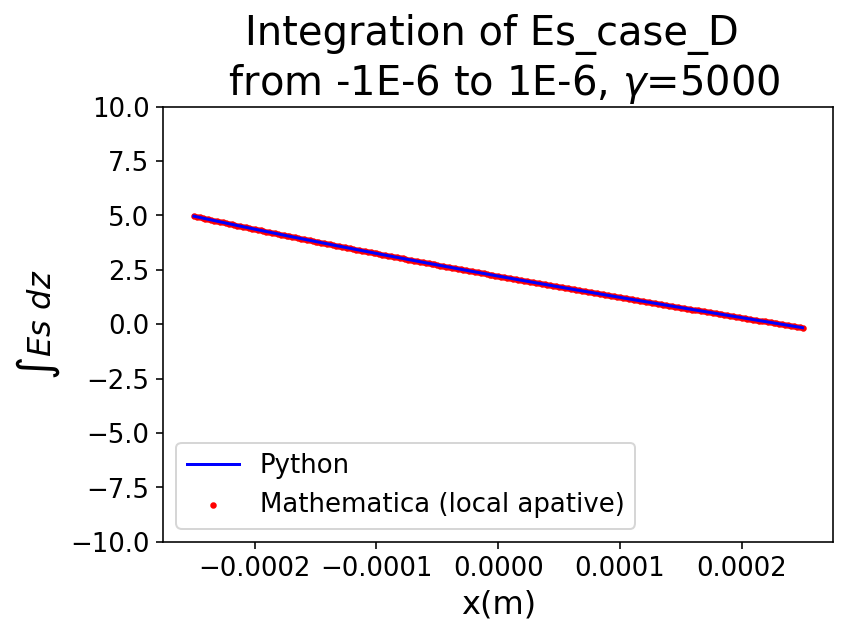

In [536]:
#plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
plt.plot(xv, temp2, color = 'blue', label='Python')

plt.scatter(v1,v2, color='red', s=5, label='Mathematica (local apative)')

plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from -1E-6 to 1E-6, $\gamma$={gamma}',  fontsize=20)

plt.ylim([-10, 10])
plt.legend(loc='lower left')

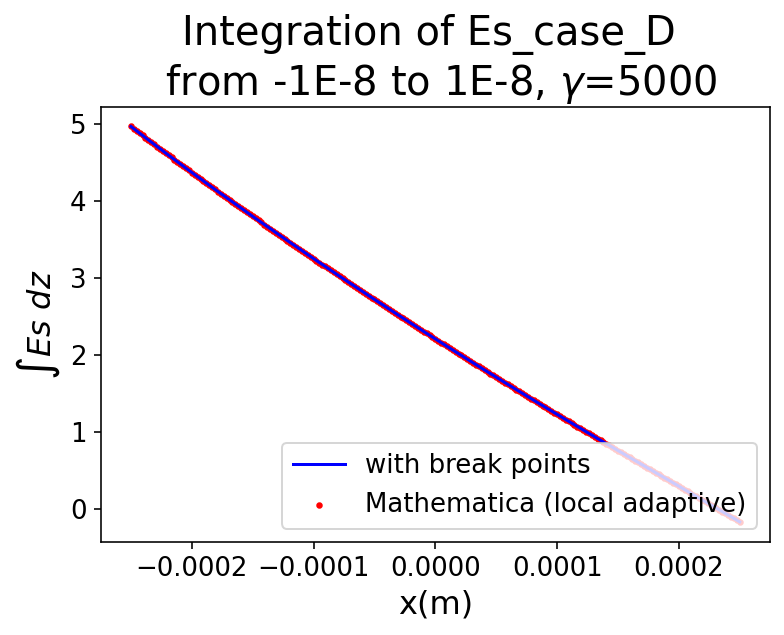

In [534]:
#plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
plt.plot(xv, temp2, color = 'blue', label='with break points')

plt.scatter(v1,v2, color='red', s=5, label='Mathematica (local adaptive)')

plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from -1E-8 to 1E-8, $\gamma$={gamma}',  fontsize=20)
plt.legend(loc='lower right')

In [324]:
import os

def string_to_num(line):
    t1 = line.strip('\n')
    #print(t1)
    t2 = t1.split('\t')
    if t2[0]=='0':
        zval = 0
    else: 
        num, denom = t2[0].split('/')
        zval = float(num)/float(denom)
    return zval, float(t2[1])

def read_math_file(filename):
    path_to_file = os.getcwd()+'/Mathematica_case_D/'+filename
    with open(path_to_file) as f:
        contents = f.readlines()
        
    zv_math = [string_to_num(contents[i])[0] for i in range(len(contents))]
    Esv_math = [string_to_num(contents[i])[1] for i in range(len(contents))]
    return zv_math, Esv_math

In [93]:
lala2 =  temp2.copy()

In [90]:
lala1 =  temp2.copy()

In [75]:
temp_temp = temp2.copy()

In [80]:
temp_temp2 = temp2.copy()

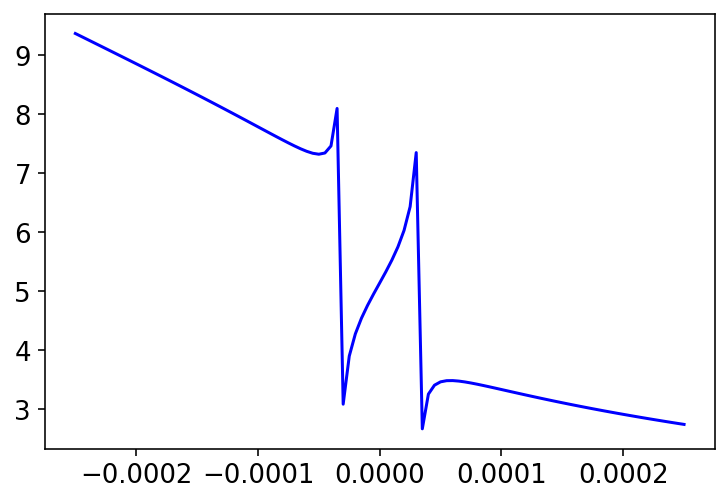

In [81]:

plt.plot(xv, temp_temp+temp_temp2, color = 'blue', label='with break points')

In [77]:
temp_temp;

In [223]:
xv = np.linspace(-5*sigma_x, 5*sigma_x, 101)
temp = np.array(list(map(integrate_Es_case_D_at_x, xv)))
temp2 = np.array(list(map(integrate_Es_case_D_at_x_with_break_points, xv)))

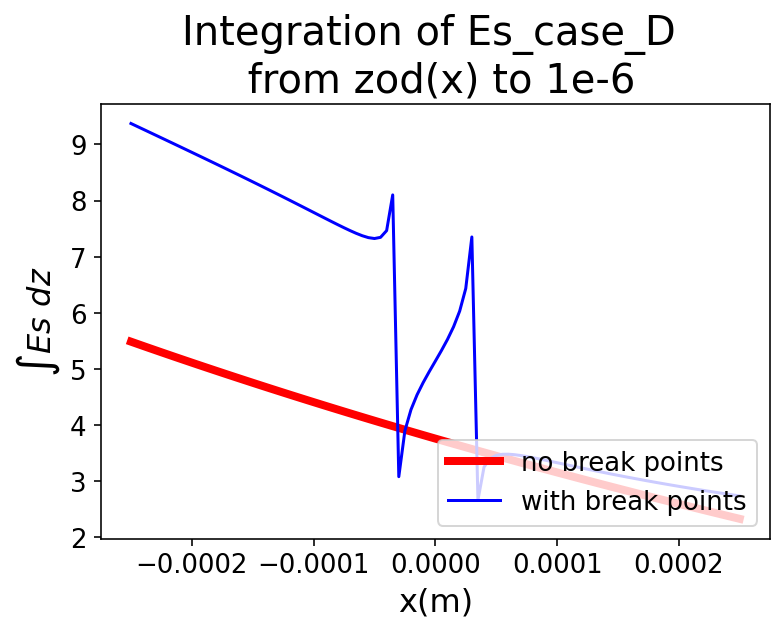

In [224]:
plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
#plt.plot(xv, temp_temp+temp_temp2, color = 'blue', label='with break points')
plt.plot(xv, lala1 + lala2, color = 'blue', label='with break points')


plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from zod(x) to 1e-6',  fontsize=20)
plt.legend(loc='lower right')

In [85]:
xv = np.linspace(-5*sigma_x, 5*sigma_x, 101)
temp = np.array(list(map(integrate_Es_case_D_at_x, xv)))
#temp2 = np.array(list(map(integrate_Es_case_D_at_x_with_break_points, xv)))

/tmp/ipykernel_26830/2136099982.py:18: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(Es_case_D_z, zod, zid, epsrel=1e-9, limit=100)[0]
/tmp/ipykernel_26830/2136099982.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(Es_case_D_z, zod, zid, epsrel=1e-9, limit=100)[0]


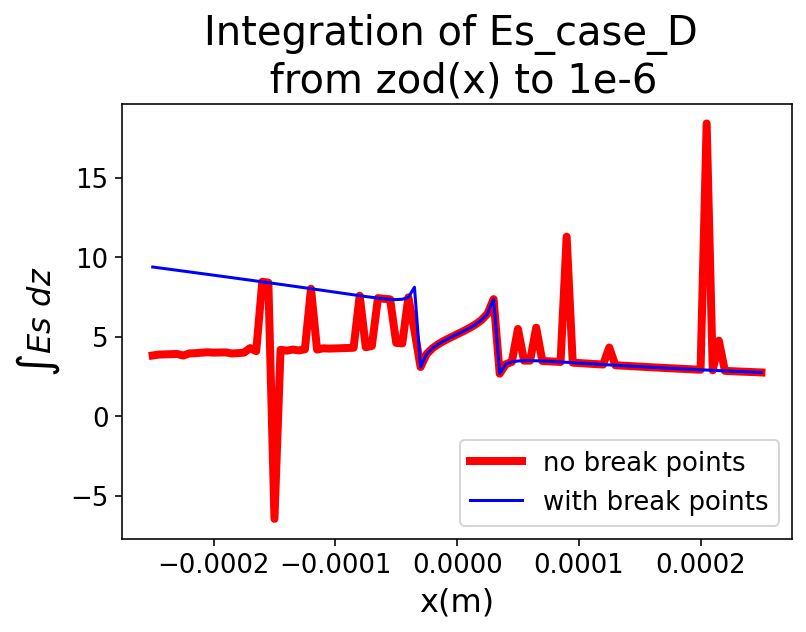

In [96]:
plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
#plt.plot(xv, temp_temp+temp_temp2, color = 'blue', label='with break points')
plt.plot(xv, lala1 + lala2, color = 'blue', label='with break points')


plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from zod(x) to 1e-6',  fontsize=20)
plt.legend(loc='lower right')

In [105]:
xv = np.linspace(-5*sigma_x, 5*sigma_x, 101)
temp = np.array(list(map(integrate_Es_case_D_at_x, xv)))
temp2 = np.array(list(map(integrate_Es_case_D_at_x_with_break_points, xv)))

/tmp/ipykernel_26830/3274645766.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(Es_case_D_z, zod, zid, epsrel=1e-9, limit=100)[0]
/tmp/ipykernel_26830/3274645766.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(Es_case_D_z, zod, zid, epsrel=1e-9, limit=100)[0]
/tmp/ipykernel_26830/3274645766.py:37: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  i1 = integrate.quad(Es_case_D_z, zod, mid, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)[0]
/tmp/ipykernel_26830/3274645766.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  i2 = inte

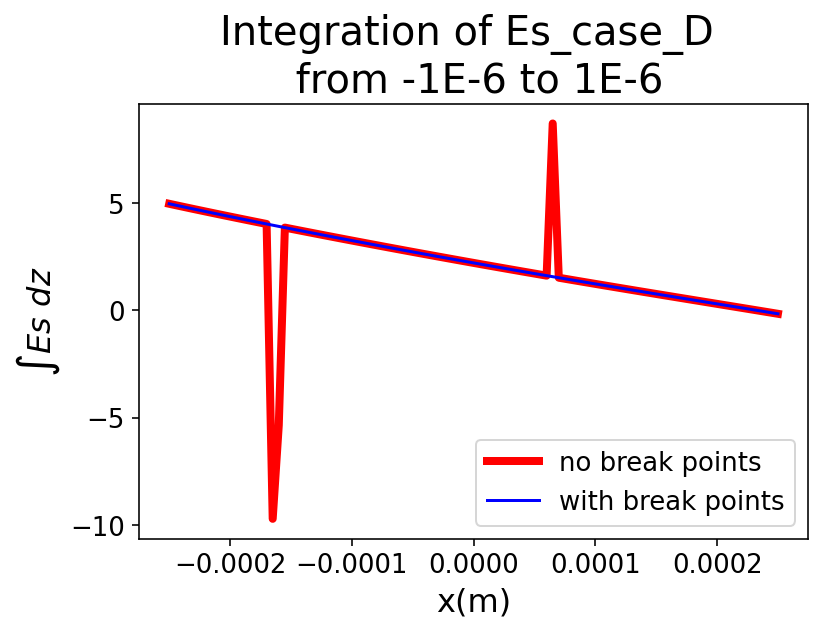

In [107]:
plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
plt.plot(xv, temp2, color = 'blue', label='with break points')

plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from -1E-6 to 1E-6',  fontsize=20)
plt.legend(loc='lower right')

In [ ]:
plt.plot(xv, temp, color = 'r', label='no break points', linewidth = 4)
plt.plot(xv, temp2, color = 'blue', label='with break points')

plt.xlabel('x(m)', fontsize=16)
plt.ylabel(r'$\int Es~ dz$', fontsize=16)
plt.title(f'Integration of Es_case_D \n from zod(x) to zid(x)',  fontsize=20)
plt.legend(loc='lower right')

# Find Ws(0,0)

In [216]:
from csr2d.wake import symmetric_vec, my_2d_convolve2

In [465]:
def IGF_z_case_D(func, z, x, dz, dx, gamma, lamb):
    """
    Special Integrated Green Function (IGF) in the z direction only
    """
    
    #func_x = lambda x: func(z, x, gamma)
    def func_z (z):
        return func(z, x, gamma, lamb)
    
    return integrate.quad(func_z, z-dz/2, z+dz/2, points = [z], epsrel=1e-4, limit=50)[0]   


def IGF_z_case_D2(func, z, x, dz, dx, gamma, lamb):
    """
    Special Integrated Green Function (IGF) in the z direction only
    """
    
    #func_x = lambda x: func(z, x, gamma)
    def func_z (z):
        return func(z, x, gamma, lamb)
    
    break_points = find_Es_case_D_spike(x) + [z] # combine two lists
    
    return integrate.quad(func_z, z-dz/2, z+dz/2, points = break_points, epsrel=1e-6, limit=100)[0]  


def green_mesh(density_shape, deltas, rho=None, gamma=None, offset=(0,0,0), component='psi_s', map_f=map, phi=None, phi_m=None, lamb=None, debug=False):
    nz, nx = tuple(density_shape)
    dz, dx = tuple(deltas) # Convenience

    if debug:
        print('component:', component)
    # Change to internal coordinates
    if (component != 'psi_s_case_E') & (component != 'Es_case_E_IGF') :
        if debug:
            print('Change to internal coordinates...')
        # handle negative rho
        #rho_sign = np.sign(rho)
        #rho = abs(rho)
        dx = dx
        dz = dz
        
        #dx = dx/rho
        #dz = dz/(2*rho)

    # Make an offset grid
    #vecs = [symmetric_vec(n, delta) for n, delta, o in zip(density_shape, [dz,dx], offset)] 
    #meshes = np.meshgrid(*vecs, indexing='ij')  # this gives zm2 and xm2
    
    zv = np.arange(-nz+1,nz,1)*dz
    xv = np.arange(-nx+1,nx,1)*dx
    
    meshes = np.meshgrid(zv, xv, indexing='ij')
    
    

    # Case D fields IGF
    if component in ['Fx_case_D_IGF', 'Es_case_D_IGF']:
        assert lamb>=0 , "lamb (exit distance over rho) must be positive for case D !"
        if component == 'Es_case_D_IGF':
            F = Es_case_D
        else:
            F = Fx_case_D        

        # Flat meshes
        Z = meshes[0].flatten()
        X = meshes[1].flatten()

        # Select special points for IGF
        ix_for_IGF = np.where(abs(Z) < dz*3.5)
        # ix_for_IGF = np.where(np.logical_and( abs(Z)<dz*2, abs(X)<dx*2 ))        

        print(f'Finding IGF for {len(ix_for_IGF[0])} points...')

        Z_special = Z[ix_for_IGF]
        X_special = X[ix_for_IGF]

        fzx = lambda z, x: IGF_z_case_D(F, z, x, dz, dx, gamma, lamb)/dz  # evaluate special
        #fzx = lambda z, x: IGF_z_case_D2(F, z, x, dz, dx, gamma, lamb)/dz  # evaluate special
        
        res = map(fzx, Z_special, X_special)
        G_short = np.array(list(res))

        print(f'Done. Starting midpoint method...')

        G = F(Z, X, gamma, lamb)    # Simple midpoint evaluation
        G[ix_for_IGF] = G_short   # Replace at special points with calculated IGF
        green = G.reshape(meshes[0].shape) # reshape
        
    return green, zv, xv

In [463]:
# Chris's parameters 
gamma = 300
rho = 1.5 # Bend radius in m

phi_m = 0.5/rho
lamb = 0.1/rho


## Additional parameters
beta = (1-1/gamma**2)**(1/2)
mc2 = 510998.950
p0c = gamma * beta * mc2  # in eV

sigma_x  = 50e-6
sigma_z  = 50e-6
# Bypassing the beam, use smooth Gaussian distribution

def lamb_2d(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2)
def lamb_2d_prime(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2) * (-z / sigma_z**2)

nz = 200
nx = 200
zvec = np.linspace(-5*sigma_z, 5*sigma_z, nz)
xvec = np.linspace(-5*sigma_x, 5*sigma_x, nx)
Z, X = np.meshgrid(zvec, xvec, indexing='ij')
lambda_grid_filtered = lamb_2d(Z,X)
lambda_grid_filtered_prime = lamb_2d_prime(Z,X)
dz = (10*sigma_z) / (nz - 1)
dx = (10*sigma_x) / (nx - 1)

dz = (5*sigma_z) / (nz - 1)
dx = (5*sigma_x) / (nx - 1)

In [464]:
dx

1.256281407035176e-06

In [466]:
Es_case_D_grid, zvec2, xvec2 = green_mesh((nz,nx), (dz,dx), rho=rho, gamma=gamma, component='Es_case_D_IGF', phi_m=phi_m, lamb=lamb, debug=False)

Finding IGF for 2793 points...
Done. Starting midpoint method...


In [468]:
zvec2.shape

(399,)

In [471]:
xvec2;

In [371]:
factor_case_D = beta**2/rho**2 * dz*dx
np.sum(Es_case_D_grid)*factor_case_D

0.004434955518427496

In [472]:
gamma

300

In [396]:
Z2, X2 = np.meshgrid(*vecs, indexing='ij')
lambda_grid = lamb_2d(Z2,X2)

In [397]:
np.sum(lambda_grid)* dz*dx

0.9999988681607064

In [474]:
np.sum(Es_case_D_grid[:,-1])*dz

16.968253126078714

In [521]:
xval = 0 * sigma_x

def Es_case_D_z(z):
    return Es_case_D(z, xval, gamma, lamb)* beta**2/rho**2

def int_Es(nz):
    nz = int(nz)
    zv2 = np.linspace(-5*sigma_z, 5*sigma_z, nz)
    dz2 = zv2[1]-zv2[0]
    haha = np.array(list(map(Es_case_D_z, zv2)))
    return np.sum(haha)*dz2

In [522]:
nz_vec = np.linspace(1000,10000,10)
jaja = np.array(list(map(int_Es, nz_vec)))

In [523]:
nz_vec

array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
        9000., 10000.])

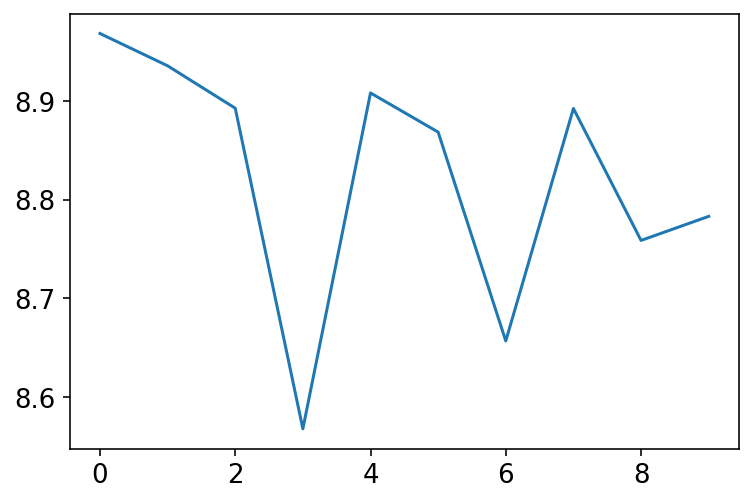

In [524]:
plt.plot(jaja)

In [501]:
nz_vec

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
       1900., 2000.])

In [493]:
haha = np.array(list(map(Es_case_D_z, zv2)))

In [494]:
np.sum(haha)*dz2

16.720531296559727

In [529]:
xval = 1 * sigma_x

def Es_case_D_z(z):
    return Es_case_D(z, xval, gamma, lamb)* beta**2/rho**2

#integrate.quad(Es_case_D_z, -5*sigma_z, 5*sigma_z)
integrate.quad(Es_case_D_z, -5*sigma_z, 5*sigma_z, points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100)

(8.53715840746141, 3.168378042085057e-06)

In [ ]:
points = find_Es_case_D_spike(xval), epsrel=1e-6, limit=100

In [469]:
np.sum(Es_case_D_grid)* dz*dx

0.009995501402215837

In [460]:
np.sum(Es_case_D_grid)* dz*dx

0.009973742529210303

In [391]:
np.sum(Es_case_D_grid)* dz*dx

0.00997876079158177

In [401]:
sup = lambda_grid*Es_case_D_grid
np.sum(sup)*dz*dx

116029.43624134529

In [447]:
np.sum(lambda_grid)*dz*dx

0.9999988681607064

In [356]:
factor_case_D = beta**2/rho**2 * dz*dx
np.sum(Es_case_D_grid)*factor_case_D

0.009778958705334405

In [367]:
factor_case_D = beta**2/rho**2 * dz*dx
np.sum(Es_case_D_grid)*factor_case_D

0.009778958705334405

In [357]:
0.009792661634375562/2

0.004896330817187781

In [209]:
def boundary_convolve(case, z_observe, x_observe, zvec, xvec, dz, dx, lambda_grid_filtered, Green, gamma=None, rho=None, phi=None, lamb=None, phi_m=None):

    beta2 = 1-1/gamma**2
    beta = np.sqrt(beta2)
    
    x_observe_index = np.argmin(np.abs(xvec - x_observe))
    z_observe_index = np.argmin(np.abs(zvec - z_observe))

    nz = len(zvec)
    nx = len(xvec)
    cond = np.zeros( (nz,nx) ) # To be filled with True and Flase
    
    # Boundary condition 
    temp = (x_observe - xvec)/rho
    
    if case == 1:
        zi_vec = rho*( phi - beta*np.sqrt(temp**2 + 4*(1 + temp)*np.sin(phi/2)**2))
        for i in range(nx):
            cond[:,i]  = (zvec > z_observe - zi_vec[i])   
            
    elif case == 2:
        zi_vec = rho*( phi - beta*np.sqrt(temp**2 + 4*(1 + temp)*np.sin(phi/2)**2))
        zo_vec = -beta*np.abs(x_observe - xvec)
        for i in range(nx):
            cond[:,i]  = (zvec > z_observe - zo_vec[i]) | (zvec < z_observe - zi_vec[i])
        
    elif case == 4:
        zid_vec = rho*(phi_m + lamb - beta*np.sqrt(lamb**2 + temp**2 + 4*(1+temp)*np.sin(phi_m/2)**2 + 2*lamb*np.sin(phi_m)))
        zod_vec = rho*(lamb - beta*np.sqrt(lamb**2 + temp**2))        
        for i in range(nx):
            cond[:,i]  = (zvec > z_observe - zod_vec[i]) | (zvec < z_observe - zid_vec[i])
        
    else:
        print('Unknown case !!!')
        #raise ValueError(f'Unknown case: {case} !!!')
        
    lambda_grid_filtered_bounded = np.where(cond, 0, lambda_grid_filtered)
    
    conv = my_2d_convolve2(lambda_grid_filtered_bounded, Green, z_observe_index, x_observe_index) 
    
    return conv

In [ ]:
Es_case_D_grid

In [210]:
z_observe = 0
x_observe = 0

factor_case_D = beta**2/rho**2 * dz*dx
boundary_convolve(4, z_observe, x_observe, zvec, xvec, dz, dx, lambda_grid_filtered, Es_case_D_grid, gamma=gamma, rho=rho, lamb=lamb, phi_m=phi_m) * factor_case_D

43485.8875562652

In [221]:
boundary_convolve(4, z_observe, x_observe, zvec, xvec, dz, dx, lambda_grid_filtered, Es_case_D_grid, gamma=gamma, rho=rho, lamb=lamb, phi_m=phi_m) * factor_case_D

43485.88755626498